In [0]:
from google.colab import files
uploaded = files.upload()

Saving Energy_consumption.csv to Energy_consumption.csv
Saving Fossil_fuel_consumption_%total.csv to Fossil_fuel_consumption_%total.csv
Saving Nuc_alt_consumption_%total.csv to Nuc_alt_consumption_%total.csv
Saving Renewable_consumption_%total.csv to Renewable_consumption_%total.csv


In [53]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

fossilFuel = pd.read_csv('Fossil_fuel_consumption_%total.csv')
fossilFuel.head()

renewable = pd.read_csv('Renewable_consumption_%total.csv')
renewable.head()

nucAlt = pd.read_csv('Nuc_alt_consumption_%total.csv')
nucAlt.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.351166,1.410646,1.694730,1.748593,1.982570,0.903806,0.916739,1.028038,1.065822,1.121397,1.114046,1.197734,1.067446,1.098590,1.208085,1.194329,1.166168,1.120664,1.110309,0.742242,0.738678,0.802166,0.820624,0.813644,0.818385,0.816589,0.950384,1.095975,0.880335,0.873405,0.933956,1.002053,1.028346,1.178593,1.609625,2.062969,1.776957,2.145972,1.949433,2.250755,2.352302,2.017802,2.546607,2.54884,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.504446,3.986335,5.532738,6.123031,6.919162,7.459716,8.148727,7.956728,10.263759,8.259655,9.727010,9.985083,9.675468,7.964705,6.741082,11.986752,10.134539,8.669959,9.147893,4.676392,5.399556,8.468053,10.012655,10.686574,12.311928,16.025289,14.372317,13.875295,20.236480,19.677699,18.295070,17.936785,18.781150,20.682115,20.332064,14.006447,15.549632,19.268818,21.875015,23.282192,22.109336,25.419174,26.068785,24.54805,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
totalCons = pd.DataFrame(columns=fossilFuel.columns)
totalCons = totalCons.append(fossilFuel[fossilFuel["Country Name"] == "United States"])
totalCons = totalCons.append(renewable[renewable["Country Name"] == "United States"])
totalCons = totalCons.append(nucAlt[nucAlt["Country Name"] == "United States"])

totalCons = totalCons.reset_index()
totalCons

,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,249,United States,USA,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,95.525670,95.566799,95.605514,95.769316,95.801621,95.860162,95.964490,95.982168,95.922613,95.858675,95.918771,95.643807,95.366758,94.977189,94.156454,93.097953,93.005615,92.422303,91.743806,91.802926,91.426072,90.831947,90.043121,89.455067,88.901041,88.301669,87.656633,87.377814,87.077239,87.093287,86.437838,85.694738,85.574822,86.117965,85.912129,85.469336,85.510061,86.456494,86.086594,85.784601,85.880831,86.345981,86.249084,86.278385,86.124313,86.018535,85.626473,85.614705,84.968222,84.154254,84.150588,83.714053,83.437178,82.940510,83.089042,82.427828,NaN,NaN,NaN,NaN
1,249,United States,USA,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.175462,4.507920,4.763083,4.281528,4.088641,4.726554,4.763930,4.514260,4.534297,5.709727,5.429624,4.678571,4.840779,5.326282,5.477657,5.841091,6.396514,6.304128,6.845541,7.354405,7.505172,8.164452,8.481450,8.713262,8.754309,8.716936,NaN,NaN,NaN,NaN
2,249,United States,USA,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,1.261261,1.334758,1.430062,1.365391,1.400595,1.472228,1.439486,1.593718,1.632476,1.760611,1.810684,2.124913,2.382324,2.784347,3.546220,4.646529,4.569871,5.025204,5.505754,5.246082,5.427287,5.877900,6.494370,6.847765,7.129414,7.830310,8.413966,8.444704,9.007786,9.316700,9.451116,9.987584,9.754804,9.577853,9.751877,10.244067,10.174803,9.424684,9.799134,10.354744,10.297053,10.210865,10.513338,10.342924,10.407737,10.354553,10.628410,10.596890,10.947505,11.560115,11.337247,11.567910,11.447572,11.684957,11.680856,11.874332,NaN,NaN,NaN,NaN


In [55]:
del totalCons['index']            
totalCons = totalCons.drop(labels=["Indicator Code", "Country Code", "Country Name"], axis=1)
totalCons = totalCons.drop(labels=['2016', '2017', '2018', '2019'], axis=1)\

totalCons.head()

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Fossil fuel energy consumption (% of total),95.525670,95.566799,95.605514,95.769316,95.801621,95.860162,95.964490,95.982168,95.922613,95.858675,95.918771,95.643807,95.366758,94.977189,94.156454,93.097953,93.005615,92.422303,91.743806,91.802926,91.426072,90.831947,90.043121,89.455067,88.901041,88.301669,87.656633,87.377814,87.077239,87.093287,86.437838,85.694738,85.574822,86.117965,85.912129,85.469336,85.510061,86.456494,86.086594,85.784601,85.880831,86.345981,86.249084,86.278385,86.124313,86.018535,85.626473,85.614705,84.968222,84.154254,84.150588,83.714053,83.437178,82.940510,83.089042,82.427828
1,Renewable energy consumption (% of total final...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.175462,4.507920,4.763083,4.281528,4.088641,4.726554,4.763930,4.514260,4.534297,5.709727,5.429624,4.678571,4.840779,5.326282,5.477657,5.841091,6.396514,6.304128,6.845541,7.354405,7.505172,8.164452,8.481450,8.713262,8.754309,8.716936
2,Alternative and nuclear energy (% of total ene...,1.261261,1.334758,1.430062,1.365391,1.400595,1.472228,1.439486,1.593718,1.632476,1.760611,1.810684,2.124913,2.382324,2.784347,3.546220,4.646529,4.569871,5.025204,5.505754,5.246082,5.427287,5.877900,6.494370,6.847765,7.129414,7.830310,8.413966,8.444704,9.007786,9.316700,9.451116,9.987584,9.754804,9.577853,9.751877,10.244067,10.174803,9.424684,9.799134,10.354744,10.297053,10.210865,10.513338,10.342924,10.407737,10.354553,10.628410,10.596890,10.947505,11.560115,11.337247,11.567910,11.447572,11.684957,11.680856,11.874332


In [56]:
totalCons = totalCons.transpose()
newHeader = totalCons.iloc[0]
totalCons.columns = newHeader
totalCons = totalCons.iloc[1:]
totalCons.columns = ['Fossil Fuel', 'Renewable', 'Alternative / Nuclear']
totalCons.head()

,Fossil Fuel,Renewable,Alternative / Nuclear
1960,95.5257,NaN,1.26126
1961,95.5668,NaN,1.33476
1962,95.6055,NaN,1.43006
1963,95.7693,NaN,1.36539
1964,95.8016,NaN,1.40059


In [57]:
totalCons = totalCons.fillna(0)
totalCons['Renewable'].iloc[0:30] = 100 - totalCons['Fossil Fuel'] - totalCons['Alternative / Nuclear']
totalCons['Fossil Fuel'] = totalCons['Fossil Fuel'] + (100 - (totalCons['Fossil Fuel'] + totalCons['Renewable'] + totalCons['Alternative / Nuclear']))
totalCons.head()


,Fossil Fuel,Renewable,Alternative / Nuclear
1960,95.525670,3.213069,1.261261
1961,95.566799,3.098443,1.334758
1962,95.605514,2.964424,1.430062
1963,95.769316,2.865294,1.365391
1964,95.801621,2.797784,1.400595


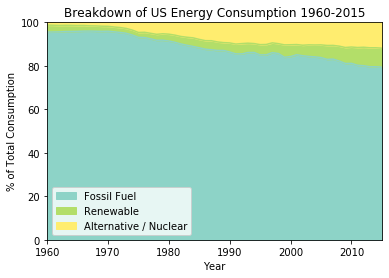

<Figure size 432x288 with 0 Axes>

In [58]:
totalCons.plot.area(colormap='Set3')
plt.xlabel("Year")
plt.ylabel("% of Total Consumption")
plt.title("Breakdown of US Energy Consumption 1960-2015")
plt.ylim(0, 100)
plt.show()
plt.savefig("usa_percent.png")

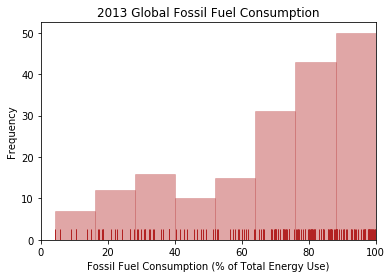

In [59]:
fossilFuel = fossilFuel.fillna(0)
fossilFuel = fossilFuel[fossilFuel['2013'] > 0]

sns.distplot(fossilFuel['2013'], kde=False, rug=True, color='firebrick', hist_kws=dict(edgecolor='firebrick', linewidth=0.5))
plt.xlim(0, 100)
plt.xlabel('Fossil Fuel Consumption (% of Total Energy Use)')
plt.ylabel('Frequency')
plt.title('2013 Global Fossil Fuel Consumption')
plt.savefig("fossilfuel_global.png")

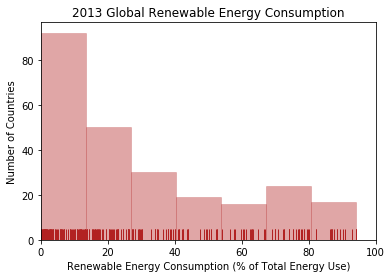

In [60]:
renewable = renewable.fillna(0)
renewable = renewable[renewable['2013'] > 0]

sns.distplot(renewable['2013'], kde=False, rug=True, color='firebrick', hist_kws=dict(edgecolor='firebrick', linewidth=0.5))
plt.xlim(0, 100)
plt.xlabel('Renewable Energy Consumption (% of Total Energy Use)')
plt.ylabel('Number of Countries')
plt.title('2013 Global Renewable Energy Consumption')
plt.savefig("renewable_global.png")

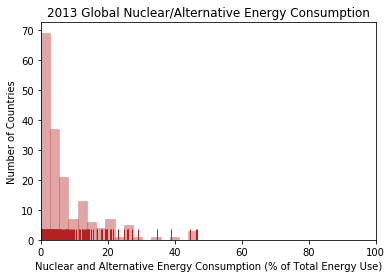

In [61]:
nucAlt = nucAlt.fillna(0)
nucAlt = nucAlt[nucAlt['2013'] > 0]

sns.distplot(nucAlt['2013'], kde=False, rug = True, color='firebrick', hist_kws=dict(edgecolor='firebrick', linewidth=0.5))
plt.xlim(0, 100)
plt.xlabel('Nuclear and Alternative Energy Consumption (% of Total Energy Use)')
plt.ylabel('Number of Countries')
plt.title('2013 Global Nuclear/Alternative Energy Consumption')
plt.savefig("nucalt_global.png")

In [0]:
energy = pd.read_csv('Energy_consumption.csv')

energy = energy.transpose()
newHeader = energy.iloc[0]
energy = energy.iloc[4:]
energy.columns = newHeader



In [63]:
totalCons
totalCons['Fossil Fuel'] = (totalCons['Fossil Fuel'] / 100) * energy['United States']

totalCons['Renewable'] = (totalCons['Renewable'] / 100) * energy['United States']

totalCons['Alternative / Nuclear'] = (totalCons['Alternative / Nuclear'] / 100) * energy['United States']

totalCons.head()




,Fossil Fuel,Renewable,Alternative / Nuclear
1960,5389.31,181.273,71.1571
1961,5363.28,173.887,74.9077
1962,5520.82,171.183,82.5802
1963,5733.5,171.539,81.743
1964,5879.29,171.698,85.9536


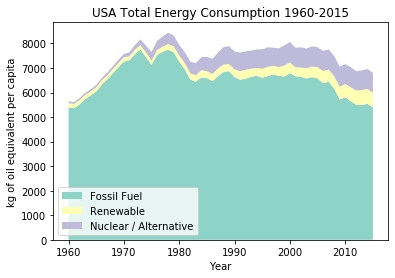

<Figure size 432x288 with 0 Axes>

In [64]:
x = []
y = [[],[],[]]

for year in totalCons.index:
  x.append(int(year))

totalCons[totalCons.columns[0]][0]
for i in range(len(totalCons.columns)):
  for value in totalCons[totalCons.columns[i]]:
    y[i].append(value)

y
pal = sns.color_palette("Set3")
plt.stackplot(x, y, labels=["Fossil Fuel", "Renewable", "Nuclear / Alternative"], colors=pal)
plt.legend(loc='lower left')
plt.xlabel("Year")
plt.ylabel("kg of oil equivalent per capita")
plt.title("USA Total Energy Consumption 1960-2015")
plt.show()
plt.savefig("usa_real.png")